In [8]:
!pip install numpy pandas matplotlib pyarrow

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


Recount to be sure

In [9]:
import os
import ast
import glob

In [10]:
dtype_spec = {
    'sent': int,
    'words': int,
    'sp_tokens': int,
    'tags_count': int
}

file_paths = glob.glob(os.path.join('..', '..', 'data', 'mulabel', 'raw', 'map_articles*.csv'))
l_col = 'tags'

file_paths = glob.glob(os.path.join('..', '..', 'data', 'mulabel', 'raw', 'mulabel_sl_p1_s1_article*.csv'))
l_col = 'labels'

file_paths = glob.glob(os.path.join('..', '..', 'data', 'mulabel', 'raw', 'eurlex*.csv'))
l_col = 'ml_label'

dfs = []
for file in file_paths:
    print(f'Reading file {file}')
    tmp_df = pd.read_csv(file, dtype=dtype_spec)
    tmp_df[l_col] = tmp_df[l_col].apply(ast.literal_eval)
    dfs.append(tmp_df)

article_df = pd.concat(dfs, ignore_index=True)
# print(f'{article_df["lang"].unique()}')

print(f'Number of samples: {article_df.shape[0]}')
print(f'And columns: {article_df.columns}')

Reading file ../../data/mulabel/raw/eurlex.csv
Number of samples: 57000
And columns: Index(['text', 'ml_label'], dtype='object')


In [11]:
from collections import Counter

# Create a list of all tags
all_tags = []
for tags in article_df[l_col]:
    all_tags.extend(tags)

# Count the occurrences of each tag
tag_counts = Counter(all_tags)

# Construct the tag counts dataframe
tag_dict = {'tag':[], 'count':[]}
for label, count in tag_counts.items():
    tag_dict['tag'].append(label)
    tag_dict['count'].append(count)

tag_df = pd.DataFrame(tag_dict).sort_values('tag', ascending=False)
tag_df.head(10)

,tag,count
1827,c_871b5612,24
2635,999,1
386,998,11
912,997,157
1183,996,32
3022,995,7
224,994,272
1732,993,9
674,990,109
3163,99,5


In [12]:
num_tags = tag_df.shape[0]
print(num_tags)

4271


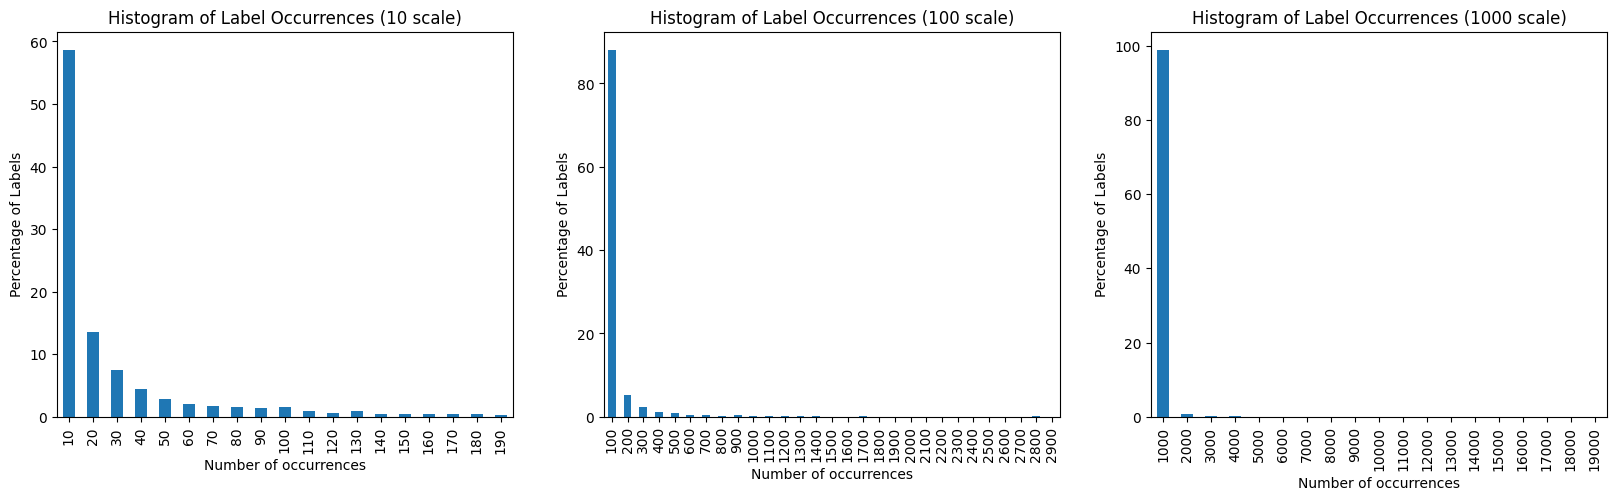

In [13]:
ocurr10_bins = [i for i in range(0, 200, 10)]
ocurr10_histogram_counts = pd.cut(tag_df['count'], bins=ocurr10_bins).value_counts().sort_index()
ocurr10_histogram_percentages = (ocurr10_histogram_counts / ocurr10_histogram_counts.sum()) * 100

ocurr100_bins = [i for i in range(0, 3000, 100)]
ocurr100_histogram_counts = pd.cut(tag_df['count'], bins=ocurr100_bins).value_counts().sort_index()
ocurr100_histogram_percentages = (ocurr100_histogram_counts / ocurr100_histogram_counts.sum()) * 100

ocurr1000_bins = [i for i in range(0, 20000, 1000)]
ocurr1000_histogram_counts = pd.cut(tag_df['count'], bins=ocurr1000_bins).value_counts().sort_index()
ocurr1000_histogram_percentages = (ocurr1000_histogram_counts / ocurr1000_histogram_counts.sum()) * 100

fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 2 columns
ocurr10_histogram_percentages.plot(
    ax=axs[0], kind='bar',
    title='Histogram of Label Occurrences (10 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[0].set_xticklabels(ocurr10_bins[1:])

ocurr100_histogram_percentages.plot(
    ax=axs[1], kind='bar', 
    title='Histogram of Label Occurrences (100 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[1].set_xticklabels(ocurr100_bins[1:])

ocurr1000_histogram_percentages.plot(
    ax=axs[2], kind='bar', 
    title='Histogram of Label Occurrences (1000 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[2].set_xticklabels(ocurr1000_bins[1:])
plt.show()

Compute label density:

In [14]:
num_tags = tag_df.shape[0]
num_samples = article_df.shape[0]
tags_diversity = {} 
sum_tags_per_sample = 0
sum_tags_over_all = 0
sample_tag_counts = []
for tags in article_df[l_col]:
    sum_tags_per_sample += len(tags)
    sample_tag_counts.append(len(tags))
    sum_tags_over_all += (len(tags) / num_tags)
    tags_s = str(sorted(set(tags)))
    if not tags_s in tags_diversity:
        tags_diversity[tags_s] = 1
    else:
        tags_diversity[tags_s] += 1
    
label_density = sum_tags_over_all / num_samples
label_cardinality = sum_tags_per_sample / num_samples
label_diversity = len(tags_diversity)
    

print(f'Label density: {label_density}')
print(f'Label cardinality: {label_cardinality}')
print(f'Label diversity: {label_diversity}')

std_dev_cols = np.std(sample_tag_counts, axis=0)
mean_cols = np.mean(sample_tag_counts, axis=0)
print(f"Mean {mean_cols} Standard deviation {std_dev_cols} along columns:")


Label density: 0.00118677987405807
Label cardinality: 5.068736842105263
Label diversity: 34982
Mean 5.068736842105263 Standard deviation 1.7006948479476385 along columns:
